# Assignment 04
## Portfolio Optimization
### Group Members: 
- Matti Ur Rehman (P19-0048)
- Umair Azad (P19-0030)

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web # to collect data
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
style.use('ggplot')
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2022, 5, 26)
# Ethereum(ETH), Binance Coin(BNB), Cardano(ADA)
tickers = ['ETH-USD', 'BNB-USD', 'ADA-USD']
returns = pd.DataFrame()
returns

""


In [4]:
returns = pd.DataFrame()
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0
weights = 0
annualized_return = 0

In [5]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
        
returns

,ETH-USD,BNB-USD,ADA-USD
Date,,,
2018-12-31,NaN,NaN,NaN
2019-01-01,0.055869,-0.014511,0.036140
2019-01-02,0.101039,0.018656,0.063718
2019-01-03,-0.038135,-0.046065,-0.056918
2019-01-04,0.036523,0.027374,0.026475
...,...,...,...
2022-05-22,0.034769,0.022860,0.027075
2022-05-23,-0.034744,-0.008912,-0.055311
2022-05-24,0.003448,0.036080,0.016814


In [6]:
number_of_portfolios = 50000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

In [7]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [8]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
#portfolio_metrics

In [9]:
portfolio_df = pd.DataFrame(portfolio_metrics)
#portfolio_df

In [10]:
portfolio_df = portfolio_df.T
#portfolio_df

In [11]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.978275,0.7556,1.2947,"[0.355, 0.34, 0.305]"
1,1.038183,0.811481,1.279368,"[0.002, 0.449, 0.549]"
2,1.022022,0.765479,1.335141,"[0.275, 0.483, 0.241]"
3,0.895152,0.775869,1.153742,"[0.479, 0.062, 0.46]"
4,1.00392,0.755926,1.328067,"[0.38, 0.446, 0.174]"
...,...,...,...,...
49995,1.02194,0.78531,1.30132,"[0.132, 0.431, 0.437]"
49996,1.049555,0.805526,1.302944,"[0.019, 0.498, 0.483]"
49997,0.964626,0.744739,1.295254,"[0.521, 0.344, 0.135]"
49998,0.95969,0.800291,1.199176,"[0.185, 0.212, 0.603]"


### Identify a minimum risk portfolio:

In [12]:
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.978275,0.7556,1.2947,"[0.355, 0.34, 0.305]"
1,1.038183,0.811481,1.279368,"[0.002, 0.449, 0.549]"
2,1.022022,0.765479,1.335141,"[0.275, 0.483, 0.241]"
3,0.895152,0.775869,1.153742,"[0.479, 0.062, 0.46]"
4,1.00392,0.755926,1.328067,"[0.38, 0.446, 0.174]"
...,...,...,...,...
49995,1.02194,0.78531,1.30132,"[0.132, 0.431, 0.437]"
49996,1.049555,0.805526,1.302944,"[0.019, 0.498, 0.483]"
49997,0.964626,0.744739,1.295254,"[0.521, 0.344, 0.135]"
49998,0.95969,0.800291,1.199176,"[0.185, 0.212, 0.603]"


In [15]:
min_risk_portfolio = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
min_risk_portfolio

# among all the known portfolios, this is the one with the minimum risk.

Return                  0.928294
Risk                    0.740933
Sharpe                  1.252872
Weights    [0.633, 0.247, 0.119]
Name: 28064, dtype: object

In [16]:
max_return_portfolio = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
max_return_portfolio

# among all the known portfolios, this is the one with the maximum return.

Return                  1.180232
Risk                    0.891869
Sharpe                  1.323324
Weights    [0.005, 0.987, 0.009]
Name: 23006, dtype: object

In [17]:
max_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]
max_sharpe_portfolio

# among all the known portfolios, this is the one with the maximum sharpe ratio.

Return                  1.086384
Risk                    0.801649
Sharpe                  1.355187
Weights    [0.167, 0.688, 0.145]
Name: 30976, dtype: object

In [18]:
print('Minimum Risk Portfolio')
print(min_risk_portfolio)
print(tickers)
print('')

print('Maximum Return Portfolio')
print(max_return_portfolio)
print(tickers)
print('')

print('Maximum Sharpe Ratio Portfolio')
print(max_sharpe_portfolio)
print(tickers)
print('')

Minimum Risk Portfolio
Return                  0.928294
Risk                    0.740933
Sharpe                  1.252872
Weights    [0.633, 0.247, 0.119]
Name: 28064, dtype: object
['ETH-USD', 'BNB-USD', 'ADA-USD']

Maximum Return Portfolio
Return                  1.180232
Risk                    0.891869
Sharpe                  1.323324
Weights    [0.005, 0.987, 0.009]
Name: 23006, dtype: object
['ETH-USD', 'BNB-USD', 'ADA-USD']

Maximum Sharpe Ratio Portfolio
Return                  1.086384
Risk                    0.801649
Sharpe                  1.355187
Weights    [0.167, 0.688, 0.145]
Name: 30976, dtype: object
['ETH-USD', 'BNB-USD', 'ADA-USD']



### Visualization:

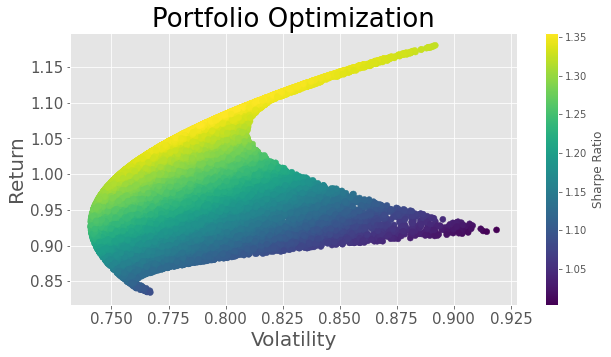

In [20]:
plt.figure(figsize = (10, 5))
plt.scatter(portfolio_risk, portfolio_return, c = portfolio_return / portfolio_risk) # c for colorbar based on sharpe.

plt.title('Portfolio Optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.colorbar(label = 'Sharpe Ratio')

plt.show()

### Comparison with individual assets:

In [21]:
returns

,ETH-USD,BNB-USD,ADA-USD
Date,,,
2018-12-31,NaN,NaN,NaN
2019-01-01,0.055869,-0.014511,0.036140
2019-01-02,0.101039,0.018656,0.063718
2019-01-03,-0.038135,-0.046065,-0.056918
2019-01-04,0.036523,0.027374,0.026475
...,...,...,...
2022-05-22,0.034769,0.022860,0.027075
2022-05-23,-0.034744,-0.008912,-0.055311
2022-05-24,0.003448,0.036080,0.016814


In [22]:
returns.mean() # daily returns

ETH-USD    0.003301
BNB-USD    0.004695
ADA-USD    0.003652
dtype: float64

In [23]:
returns.std() # daily standard deviation

ETH-USD    0.048408
BNB-USD    0.056444
ADA-USD    0.057934
dtype: float64

In [24]:
returns.mean() * 252 # annual returns

ETH-USD    0.831799
BNB-USD    1.183171
ADA-USD    0.920356
dtype: float64

In [25]:
returns.std() * 252 # annual standard deviations

ETH-USD    12.198890
BNB-USD    14.223769
ADA-USD    14.599282
dtype: float64